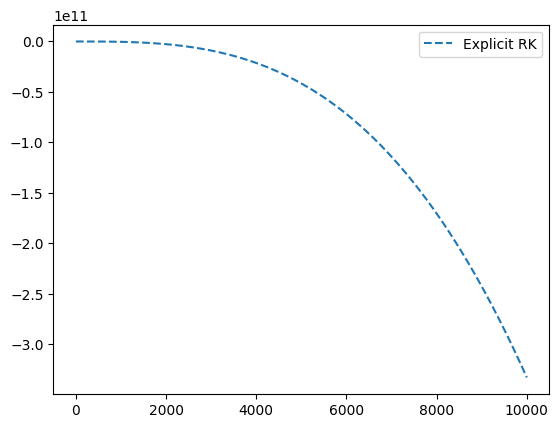

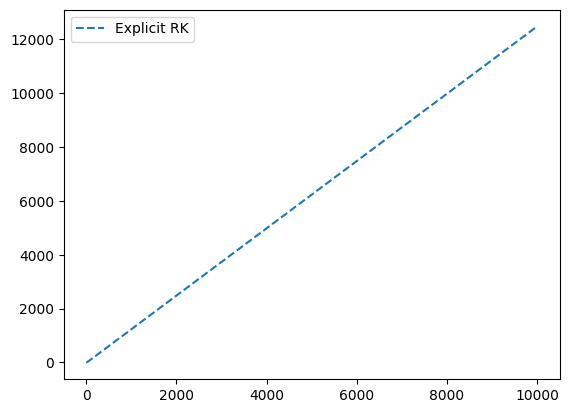

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

def implicit_midpoint_for_system(x_end, h, x0, y0, f, df):
    x = [x0]
    y = [y0]

    def G(r, xk, yk):
        return r - f(xk + h*0.5, yk+h*r*0.5)

    def dG(r, xk, yk):
        return np.eye(y0.shape[0]) - h * df(xk + 0.5, yk+h*r*0.5)*0.5

    def newton(r, xk, yk, tol=1e-12, max_iter=20):
        for k in range(max_iter):
            b = G(r, xk, yk)
            A = dG(r, xk+0.5*h, yk)
            p, l, u = scipy.linalg.lu(A)
            z = scipy.linalg.solve_triangular(l, p.T@b, lower=False)
            delta = scipy.linalg.solve_triangular(u, z, lower=False)
            r -= delta
            if np.linalg.norm(delta) < tol:
                break
        return r

    s = f(x[-1], y[-1])
    while x[-1] < x_end-h/2:
        r = h*newton(s, x[-1], y[-1])
        xk1 = x[-1]+h
        yk1 = y[-1]+r*h*4
        x.append(xk1)
        y.append(yk1)

    return np.array(x), np.array(y)

def explicit_runge_kutta(x_end, h, x0, y0, f):
    xs = np.arange(x0, x_end + 1/2 * h, h, dtype=float)
    ys = np.zeros_like(xs, dtype=float)
    ys[0] = y0

    for i, x in enumerate(xs[:-1]):
        y = ys[i]
        r1 = f(x, y)
        r2 = f(x+1/2*h, y+1/2*r1*h)
        r3 = f(x+1/2*h, y+1/2*r2*h)
        r4 = f(x+1*h, y+1*r3*h)
        r = 1/6*r1 + 2/6 * r2 + 2/6 * r3 + 1/6 * r4
        ys[i+1] = y + r * h

    return np.array(xs), np.array(ys)

a=0.7
b=0.8
tau=12.5
r=0.1
i = 3.24

f = lambda v, w: np.array([v-v**3/3-w+r*i, (v+a-b*w)/tau])
df = lambda v, w: np.array([
    [1-v**2, -1],
    [1, -b],
])

f1 = lambda v, w: v-v**3/3-w+r*i
f2 = lambda v, w: (v+a-b*w)/tau

x1, y1 = explicit_runge_kutta(x_end=10_000, h=0.1, x0=0, y0=0, f=f1)
plt.plot(x1, y1,'--', label="Explicit RK")
plt.legend()
plt.show()

x2, y2 = explicit_runge_kutta(x_end=10_000, h=0.1, x0=0, y0=0, f=f2)
plt.plot(x2, y2,'--', label="Explicit RK")
plt.legend()
plt.show()

In [15]:
print(y1[-1], y2[-1])

-333233343332.0312 12481.343750000007
